In [5]:
%load_ext autoreload
%autoreload 2
from vpower.interp import SimulationParticles
import matplotlib.pyplot as plt
plt.style.use('yjhe.mplstyle')

SNAPSHOT = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind0_gmc9/snapshot_550.hdf5'
allPar = SimulationParticles.load_snapshot(SNAPSHOT, remove_bulk_velocity=False)          # load the snapshot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
Nsize = 256
allField = allPar.interp_to_field(Nsize=Nsize, eps=0.1, auto_padding=True)  # run the interpolation

Interpolating velocity field...
Padding complete. Padded box length: 1.0, Padded box size: 256
Histogram deposition done. Time taken: 4.40 s
Data file saved. Time taken: 13.10 s
Query file saved. Time taken: 60.03 s



real	1m3.157s
user	1m1.718s
sys	0m1.257s


Approximate Nearest Neighbour complete. Time taken: 63.19 s.
ANN output read. Time taken: 5.57 s
Interpolation done. Time elapsed: 147.36 s


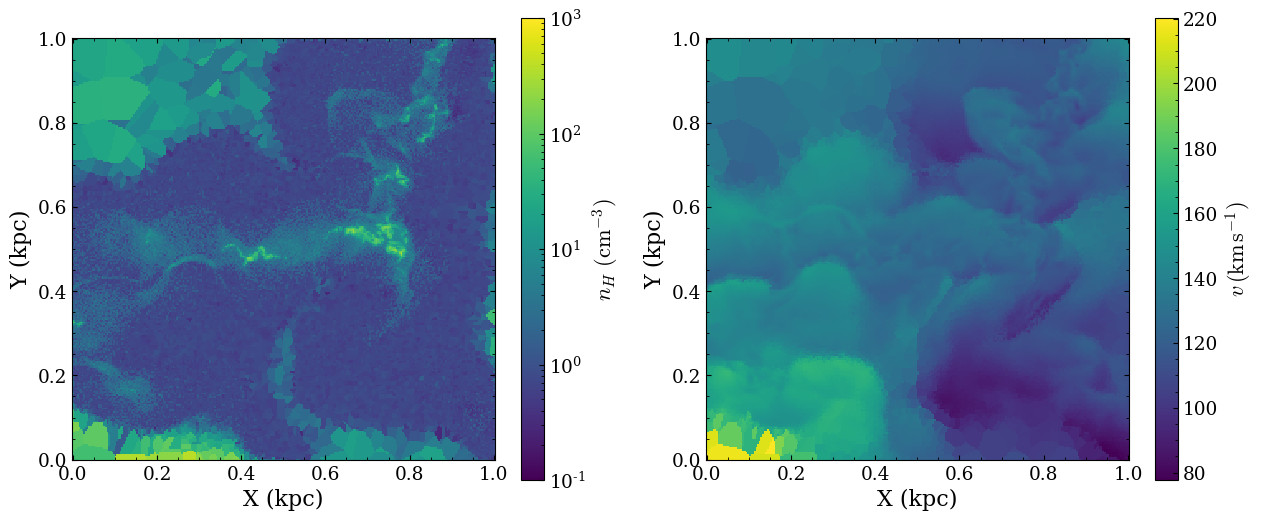

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
allField.plot_density_slice(index=Nsize//2, axis=2, ax=ax[0])
allField.plot_velocity_slice(component=0, index=Nsize//2, axis=2, ax=ax[1])
plt.show()

In [8]:
from vpower.interp import check_conservation
check_conservation(allPar, allField)

Total mass of particles: 1.260e-03
Total mass after interpolation: 2.479e-02
Total mass restored by 1967.822%




Total momentum of particles: [ 0.16640169  0.2250191  -0.00676618]
Total momentum after interpolation: [3.71364744 4.55991771 0.1289134 ]
Total momentum restored by (2231.737%, 2026.458%, -1905.262%)


Total kinetic energy of particles: 3.141e+01
Total kinetic energy after interpolation: 7.188e+02
Total kinetic energy restored by 2288.419%
